![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) after `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [225]:
# Import necessary libraries
library(tidyverse)
library(dplyr)
library(infer)

In [226]:
women_result <- read.csv("women_results.csv")
men_result <- read.csv("men_results.csv")


In [227]:
women_scores <- women_result %>% filter(date > '2002-01-01') %>%
	filter(tournament == "FIFA World Cup") %>% 
	arrange(date) %>%
	mutate(scores= home_score + away_score);
	# %>% select(X,scores)


In [228]:
mw<- mean(women_scores$scores)
sw<- sd(women_scores$scores)
nw <- nrow(women_scores)
mw
sw
nw

[1] 2.98

[1] 2.022387

[1] 200

In [229]:
men_scores <- men_result %>% filter(date > '2002-01-01') %>%
	filter(tournament == "FIFA World Cup") %>% 
	arrange(date) %>%
	mutate(scores= home_score + away_score);


In [230]:
mm<- mean(men_scores$scores)
sm<- sd(men_scores$scores)
nm <- nrow(men_scores)
mm
sm
nm

[1] 2.513021

[1] 1.652544

[1] 384

In [231]:
d <- sqrt(sw^2/nw + sm^2/nm)
tscore <- (mw-mm)/ d
tscore

[1] 2.812823

In [232]:
p_v <- pt(tscore, nw+nm-2, lower.tail = FALSE)
p_v

[1] 0.002538319

In [233]:
# both_scores <- women_scores %>% inner_join(men_scores, by = c("X"), suffix = c("_women","_men"));
# both_scores

In [234]:
result_test <- t.test(
	women_scores$scores,
	men_scores$scores,
	alternative = "greater",
	mu=0,
	Paired = TRUE
)

In [235]:
result_test


	Welch Two Sample t-test

data:  women_scores$scores and men_scores$scores
t = 2.8128, df = 340.1, p-value = 0.002598
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.193158      Inf
sample estimates:
mean of x mean of y 
 2.980000  2.513021 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


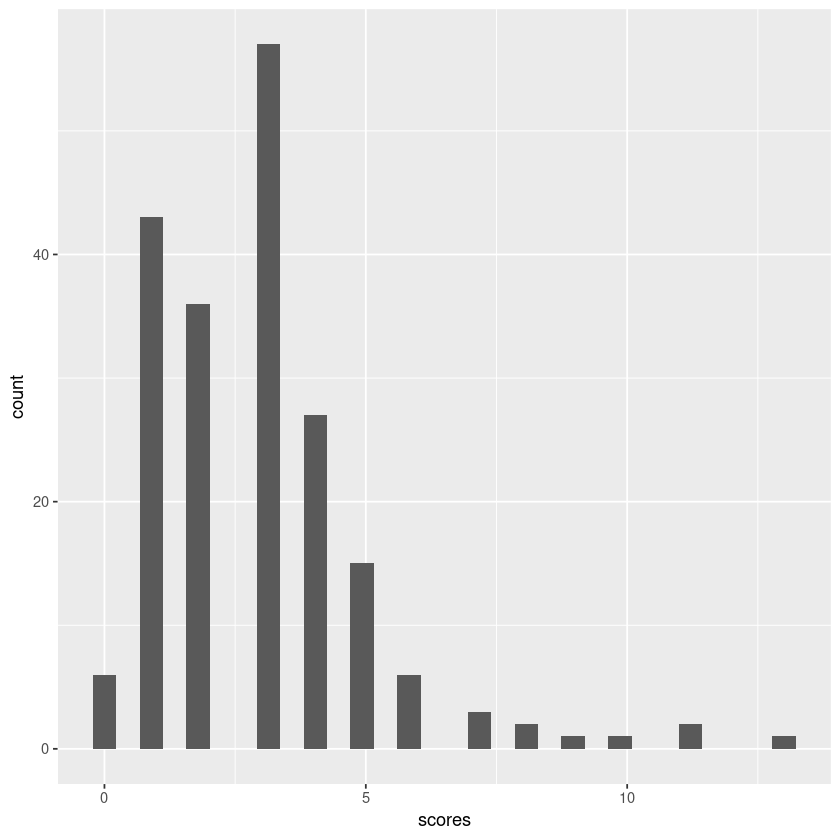

In [237]:
women_scores %>% ggplot(aes(scores)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


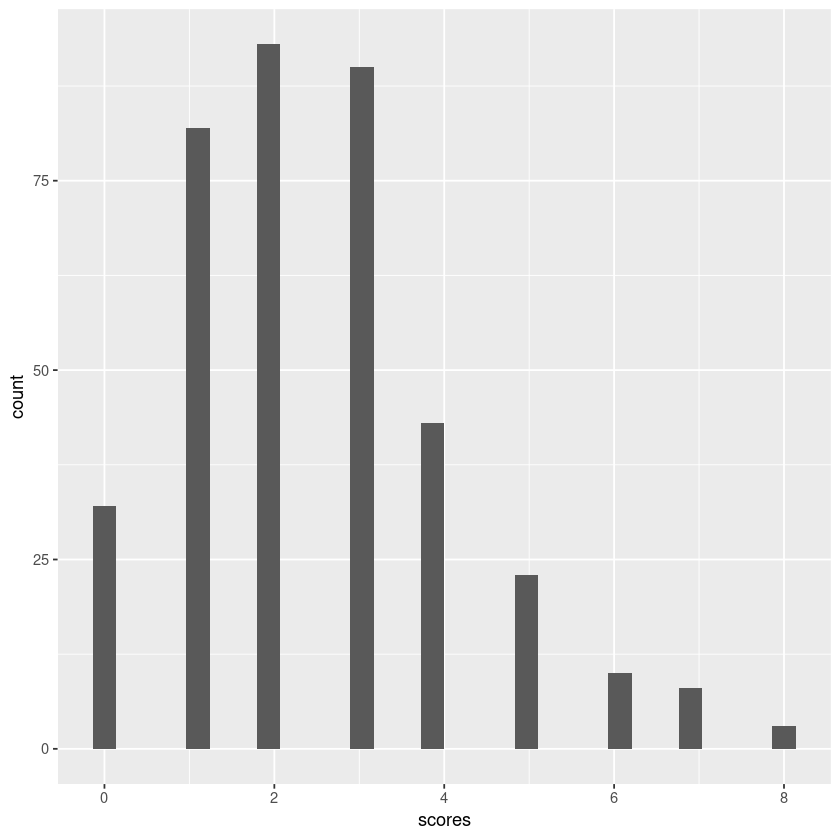

In [238]:
men_scores %>% ggplot(aes(scores)) + geom_histogram()

Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.
An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.
To determine if a parametric or non-parametric test is appropriate, you'll need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.
The normal distribution is a symmetric bell-shaped curve, with the distribution centered around the mean.
Plotting a histogram displaying the distribution of the number of goals scored in men's and women's matches will give you an idea about whether the dataset is normally distributed or not.
If the normality is unclear from the plot, you can run a test of normality, such as a Kolmogorov–Smirnov test or the Shapiro–Wilk test.

In [ ]:
#As we Can see the data is right skewed, we need to implement the wilcox method, as the unpaired t-test is for the normal distribution. we can see that both the p-values are below 0.1, we can definitely say to reject the null hypothesis but we need to know the exact p_value, we can calculate the value by Wilcox Mann-Whitney test (wilcox.test()).

In [239]:
wilcox.test(
	women_scores$scores, men_scores$scores,
	alternative = "greater",
	correct = FALSE
)


	Wilcoxon rank sum test

data:  women_scores$scores and men_scores$scores
W = 43273, p-value = 0.005103
alternative hypothesis: true location shift is greater than 0


In [240]:
p_val <- 0.005103;
alpha <- 0.1;
# As p is less than alpha
result <- "reject";

In [241]:
result_df <- data.frame(
	p_val = c(0.005103),
	result = c("reject")
)

In [242]:
result_df

p_val    result
1 0.005103 reject